In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
import matplotlib.pyplot as plt
import pathlib
from ssd.utils import load_config

In [2]:
#config_type = "voc_vgg"
config_type = "ssd300"
cfg = load_config(f"../configs/{config_type}.py")
logs = tops.logger.read_logs(pathlib.Path(f"../outputs/{config_type}"))

NOTE! Installing ujson may make loading annotations faster.
It looks like you are currently working on the server, with a 'working directory' in: /work/snotra/torjesn
	If you struggle with NTNU home directory becoming full, we recommend you to change the output directory to: /work/snotra/torjesn
	 /work/snotra/torjesn does not sync with NTNU HOME, and is a directory only located on the server.
	 To change the output directory of SSD, set save_in_work to True in the file configs/utils.py, in the function get_output_dir.
Saving SSD outputs to: outputs/
Found dataset directory in: /work/datasets/mnist_object_detection/train
Found dataset directory in: /work/datasets/mnist_object_detection/val


In [3]:
# The log is formatted as a list of dictionaries
print(logs[:10])

[{'amp/grad_scale': 32768.0, 'global_step': 0}, {'loss/regression_loss': 2.896953821182251, 'loss/classification_loss': 9.695448875427246, 'loss/total_loss': 12.592402458190918, 'global_step': 0}, {'stats/learning_rate': 0.000509, 'global_step': 1}, {'stats/learning_rate': 0.000518, 'global_step': 2}, {'stats/learning_rate': 0.000527, 'global_step': 3}, {'stats/learning_rate': 0.000536, 'global_step': 4}, {'stats/learning_rate': 0.000545, 'global_step': 5}, {'stats/learning_rate': 0.000554, 'global_step': 6}, {'stats/learning_rate': 0.000563, 'global_step': 7}, {'stats/learning_rate': 0.0005719999999999999, 'global_step': 8}]


In [4]:
# We are saving logs to disk every 10th iteration, thus we need to filter out all entries without a loss
loss_entries = [entry for entry in logs if "loss/regression_loss" in entry]

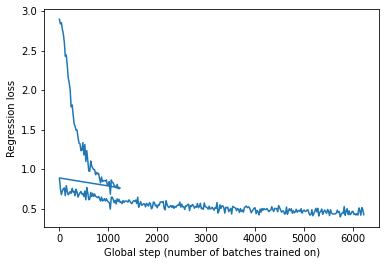

In [5]:
plt.plot([entry["global_step"] for entry in loss_entries], [entry["loss/regression_loss"] for entry in loss_entries])
plt.ylabel("Regression loss")
plt.xlabel("Global step (number of batches trained on)")
plt.savefig('4b.png')